In [1]:
import experts

from experts import problems
from experts.problems import VectorExpertsProblem

import numpy as np
import pandas as pd
import seaborn as sns

In this case the outcome is a sequence of vectors.

In the other notebook we saw how to use ScalarExpertsProblem in the case where the output is a sequence of scalar values. With VectorExpertsProblem we can also use the mixture algorithm when the output is a sequence of 0/1 vectors.

Suppose, for example, that we have an output sequence of ten time steps and at each time step the output (the thing we want to predict) is a 0/1 vector with 5 components.

In [2]:
np.random.seed(42)

T = 10
c = 5 # number of components

y1 = np.rint(np.random.rand(T, c))
y1

array([[0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0.]])

In this case, expert predictions for the full sequence will be an array with same dimensions but with values from [0,1]. For example, if we have three experts then we end up with an array of dimension 3 x 10 x 5.

In [3]:
n = 3 # number of experts

E1 = np.random.rand(n, T, c)
print(E1)

[[[0.96958463 0.77513282 0.93949894 0.89482735 0.59789998]
  [0.92187424 0.0884925  0.19598286 0.04522729 0.32533033]
  [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451]
  [0.54269608 0.14092422 0.80219698 0.07455064 0.98688694]
  [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734]
  [0.72900717 0.77127035 0.07404465 0.35846573 0.11586906]
  [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232]
  [0.32518332 0.72960618 0.63755747 0.88721274 0.47221493]
  [0.11959425 0.71324479 0.76078505 0.5612772  0.77096718]
  [0.4937956  0.52273283 0.42754102 0.02541913 0.10789143]]

 [[0.03142919 0.63641041 0.31435598 0.50857069 0.90756647]
  [0.24929223 0.41038292 0.75555114 0.22879817 0.07697991]
  [0.28975145 0.16122129 0.92969765 0.80812038 0.63340376]
  [0.87146059 0.80367208 0.18657006 0.892559   0.53934224]
  [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516]
  [0.42710779 0.81801477 0.86073058 0.00695213 0.5107473 ]
  [0.417411   0.22210781 0.11986537 0.33761517 0.94290

As with ScalarExpertsProblem we instantiate VectorExpertsProblem by giving it the expert predictions and the outcome. To run the mixture algorithm we call the mixture method, passing an optional value for the learning rate.

In [4]:
A1 = VectorExpertsProblem(E1, y1)

A1.mixture(0.01)

Now the learner loss is available in the learnerLossVector member.

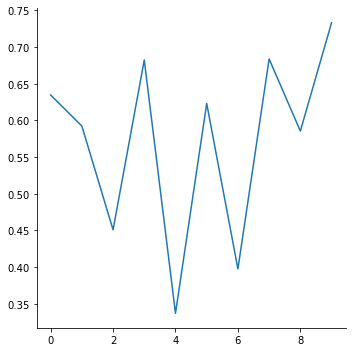

In [5]:
A1.learnerLossVector

sns.relplot(x = range(10), y = A1.learnerLossVector, kind = "line")

The expertsLossMatrix contains three vectors, one for each expert, of length equal to the learnerLossVector.

In [6]:
A1.expertsLossMatrix

array([[0.79301932, 0.70391262, 0.51341584, 0.76413194, 0.6226089 ,
        0.55902563, 0.45722575, 0.47449922, 0.76660945, 0.47649125],
       [0.66113398, 0.39284192, 0.6263627 , 0.23187938, 0.69409686,
        0.24559816, 0.57072042, 0.35386638, 0.44071043, 0.38958279],
       [0.67669799, 0.2272955 , 0.60363018, 0.66832562, 0.67140444,
        0.5849084 , 0.39485702, 0.55792717, 0.73864801, 0.67819473]])

Calculate the total loss for each expert.

In [7]:
expert_losses = np.sum(A1.expertsLossMatrix, axis = 1)
print(expert_losses)

[6.13093992 4.606793   5.80188906]


The best expert is the one with the lowest total error.

In [8]:
best_expert_index = np.argmin(expert_losses)
print(best_expert_index)

1


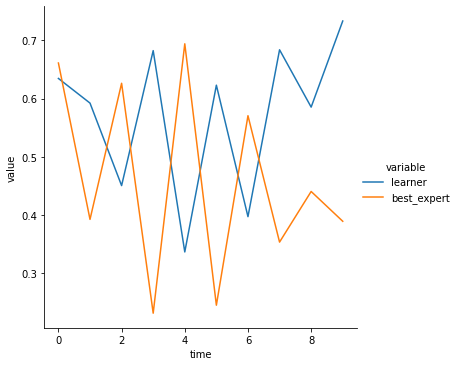

In [9]:
df = pd.DataFrame(
    dict(
        time = np.arange(10),
        learner = A1.learnerLossVector,
        best_expert = A1.expertsLossMatrix[best_expert_index, :]
        )
    )

df_long = pd.melt(df, ['time'])

sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_long)

Compare cumulative loss for the learner and the best expert.

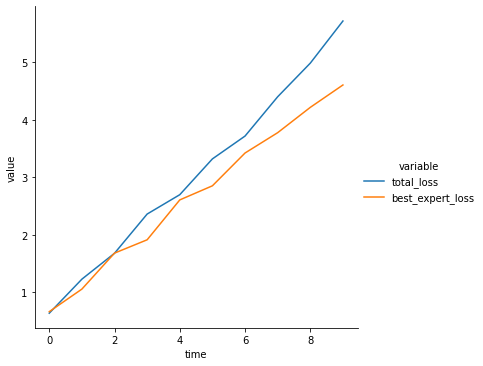

In [10]:
df_cum = pd.DataFrame(
    dict(
        time = np.arange(10),
        total_loss = A1.learnerLossVector.cumsum(),
        best_expert_loss = A1.expertsLossMatrix[best_expert_index, :].cumsum()
        )
    )

df_cum_long = pd.melt(df_cum, ['time'])

sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_cum_long)